# Wright-Fisher model
## Motivation



Goal of population genetics:
- To infer the past history of populations
- Describe the evolutionary forces that have shaped their genetic variation.(random genetic drift, natural selection, mutation,migration)

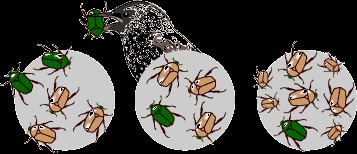

In [7]:
from IPython.display import Image, HTML, display
Image("/Users/BharathiSrinivasan/Downloads/natural_selection.jpg", embed=True)

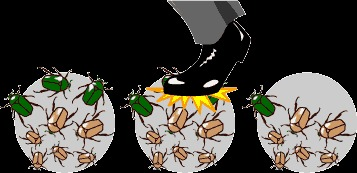

In [8]:
Image("/Users/BharathiSrinivasan/Downloads/beetles_mech3.jpg", embed=True)

Information about these evolutionary and demographic forces can be retrieved from allele frequency data.

A crucial step for carrying out statistical inference in the Wright-Fisher model is determination of the distribution of allele frequency (DAF).
Even though the Wright-Fisher model has a very simple mathematical formulation, no tractable analytical form exists for the DAF. Therefore, various approximations have been developed, ranging from purely analytical to purely numerical.

To build an actual evolutionary model, we need to specify a number of parameters: the population size, the structure of the genome (e.g., the number of chromosomes, its ploidy), the mode of reproduction of the population (e.g., sexual vs asexual), the structure of the population, the distribution of offspring by individual, how new alleles are created, how alleles are transmitted from parent to offspring. We also have to decide on the starting point in our model, the ancestral population from which we will consider evolution. Since this is our first model, we'd like to keep everything as simple as possible:

* Population size:    constant, $N$

* Structure of the genome:   one single haploid chromosome of length 1 base pair. 

* Mode of reproduction:      asexual

* Mutation process:          No mutation

* Transmission:              Asexual transmission (clonal reproduction)

The population size at each time is an exact, predefined $N$. Imagine that each parent produces very many offspring, but that only $N$ offspring from the entire population are allowed to survive, and these are selected at random among all offspring. 

This sampling approach defines the Wright-Fisher model.     

## Libraries

In [10]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 

## Implementation

We will suppose that the single site has two alleles labeled $0$ and $1$. We need to specify the number of individuals nInd in the initial population and the proportion $p0$ of $1$ alleles


In [11]:
p0   = 0.1  # initial proportion of "1" alleles 
nInd = 100  # initial population size (number of individuals)


Now we need to create an initial population with the given number of individuals, and the appropriate proportion of 1 alleles. We'll store the population as a np.array called "initial_population", of length nInd containing 0s and 1s.

In [12]:
# Initialize a population of length nInd with only 0 alleles. 
initial_population = np.zeros(nInd)

# Set the first p0*nInd alleles to 1. 
initial_population[0:int(p0*nInd)] = 1

# For added realism, shuffle the population so that the ones are distributed across the sample.
np.random.shuffle(initial_population)
print(initial_population)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]


To take finite samples from this population, we can use the np.random.choice function. When taking a sample from a population, we can pick each sample only once--the "replace=False" option below tells us that we don't replace the sampled individual in the population before drawing a new one.

In [13]:
sample_size = 10
np.random.choice(initial_population, sample_size, replace=False )

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0.])

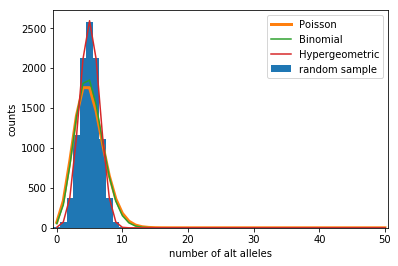

In [14]:
import scipy
from scipy import stats

iterations = 10000  # the number of times to draw.
sample_size = 50  # the size of each sample
alt_counts = []  # number of alternate alleles (i.e., 1's) for each draw

for i in range(iterations):
    sample=np.random.choice(initial_population, sample_size, replace=False)
    # get the number of alt alleles
    alt_counts.append(sample.sum())
    
# plot a histogram of sampled values    
plt.hist(alt_counts, sample_size + 1, range=(-0.5, sample_size + 1 - 0.5), label="random sample")
plt.xlabel("number of alt alleles")
plt.ylabel("counts")

# Compare this to some discrete distributions
x_range = range(sample_size + 1) # all the possible values

p = np.sum(initial_population) * 1. / len(initial_population)  # initial fraction of alt's

# poisson with mean sample_size * p
y_poisson = stats.poisson.pmf(x_range, sample_size*p) * iterations
# binomial with probability p and  sample_size draws
y_binom = stats.binom.pmf(x_range, sample_size,p) * iterations
# hypergeometric draw of sample_size from population of size len(initial_populationpop)
# with np.sum(initial_population) ones.
y_hypergeom = stats.hypergeom.pmf(x_range, len(initial_population), np.sum(initial_population), sample_size)\
                * iterations

plt.plot(x_range, y_poisson, label="Poisson", lw=3)
plt.plot(x_range, y_binom, label="Binomial")
plt.plot(x_range, y_hypergeom, label="Hypergeometric")
plt.xlim(-0.5, sample_size + 0.5)
plt.legend()

 The distribution of the number of alternate alleles is a hypergeometric probability distribution. The probability that an s trail hypergeometric experiment results in exactly x alternate alleles, when the population size is nInd, (p*nInd) of which are classified as alternate alleles. The s trails are dependent as they are done without replacement.

Wright-Fisher reproduction: 

We generate a very large number of offspring for each parent, and than we take a sample from this very large number of offspring


Function pop takes in a parental population as an array (such as "initial_population", above), and returns an offspring population. 

In [15]:
def generation(pop):
    """Takes in a list or array describing an asexual parental population. 
    Return a descendant population according to Wright-Fisher dynamics with constant size"""
    nInd = len(pop) 
    #now generate the offspring population.
    return np.random.choice(pop, nInd, replace=True) 
                    
generation(initial_population)
        

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

As for regular sampling, we get a different number of ones every time we run the "generation" function. Here again, I generated a bunch of samples just to get an idea of how much variation there is, and overlaid some plausible distribution.

Binomial distribution and Poisson distributions fit quite well. And this is natural, because the sampling is now   done with replacement, meaning independent trials, which are the characteristics of Binomial and Poisson distributions.  Of these two Binomial fits the generated distribution the best. Hypergeometric distribution underfits our distribution   as trails are considered done without replacement in Hypergeometric distributions.

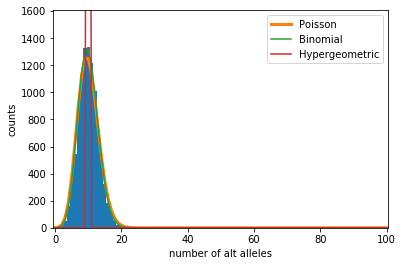

In [16]:
nsample = 10000  # the number of samples to draw.
alt_counts = []  # number of alternate alleles (i.e., 1's) for each draw

for i in range(nsample):
    offspring = generation(initial_population)
    alt_counts.append(offspring.sum())

hist = plt.hist(alt_counts, len(initial_population)+1, range=(0-0.5, len(initial_population)+0.5))
plt.xlabel("number of alt alleles")
plt.ylabel("counts")

#Here I just check that the initial population is still a list of length nInd
assert nInd==len(initial_population),"initial_population doesn't have the same length as nInd" 

x_range=range(nInd+1)                  #all the possible values
p=np.sum(initial_population)*1./nInd   #the initial frequency

#Compare this to some distributions
y_poisson=stats.poisson.pmf(x_range, nInd*p) * nsample
y_binom=stats.binom.pmf(x_range, nInd, p) * nsample
y_hypergeom=stats.hypergeom.pmf(x_range, nInd, np.sum(initial_population), nInd) * nsample

plt.plot(x_range, y_poisson, label="Poisson",lw=3)
plt.plot(x_range, y_binom, label="Binomial")
plt.plot(x_range, y_hypergeom, label="Hypergeometric")
plt.xlim(-0.5, nInd+0.5)
plt.ylim(0, 1.2*max(hist[0]))
plt.legend()

In [17]:
nGen = 100  # number of generations to simulate
history = [initial_population]  # a container list for our simulations. It will contain the population 
                                        # state after generations 0 to nGen
for i in range(nGen):
    # evolve the population for one generation, and append the result to history.
    history.append(generation(history[-1])) 
history = np.array(history)  # convert the list into an array for convenient manipulation later on

Results: Let's compute the allele frequency at each generation and plot that as a function of time.

Text(0,0.5,'population frequency')

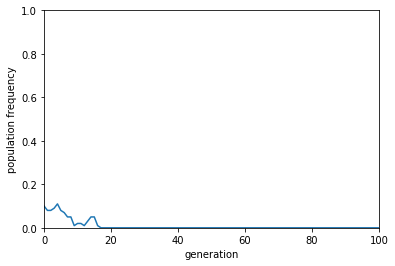

In [9]:
#compute the allele frequency at each generation.
#freqs should be a list or array of frequencies, with one frequency per generation.
#history is a np array and has two methods that can be used: sum, and mean. 
#Mean is probably the best bet here. 
freqs = np.mean(history, axis=1)
plt.plot(freqs)
plt.axis([0, 100, 0, 1]);#define the plotting range
plt.xlabel("generation")
plt.ylabel("population frequency")

We will organize this a bit better, using a Python "class" and object-oriented programming. We have defined above variables that describe a population (such as the population size nInd, and the ancestral frequency g0). We have also defined functions that apply to a population, such as "generation". A class is used to keep track of the relation between objects, variables, and functions. 
    

In [18]:
class population:
    """
    Initialization call: 
    
    population(nInd,p0)
    requires a number of individuals nInd and an initial frequency p0
    
    Variables:
    nInd: The number of individuals
    p0: the initial allele frequency
    initial_population: an array of nInd alleles
    history: a list of genotypes for each generation 
    traj: an allele frequency trajectory; only defined if getTraj is run. 
    
    Methods:
    generation: returns the offspring from the current population, which is also the last one in self.history
    evolve: evolves the population for a fixed number of generations, stores results to self.history
    getTraj: calculates the allele frequency history for the population
    plotTraj: plots the allele frequency history for the population
    
    """
    def __init__(self, nInd, p0): 
        """initialize the population. nInd is the number of individuals. p0 is the initial allele frequency.
        __init__ is a method that, when run, creates a "population" class and defines some of its variables.  
        """
        self.nInd = nInd
        self.p0 = p0 
        #initialize the population
        self.initial_population = np.zeros(self.nInd) 
        self.initial_population[0 : int(p0*self.nInd)] = 1
        np.random.shuffle(self.initial_population)
        #history is a container that records the genotype at each generation.
        #we'll update this list 
        self.history = [self.initial_population]

    def generation(self): 
        """class methods need "self" as an argument in they definition to know that they apply to a "population" object. 
        The class structure
        gives you a more readable way of calling this function: If we have a population "pop", we can write pop.generation(), and python will know how to pass
        the population as the first argument. Putting the object name upfront often makes code more readable.   
        Takes the last element of the history. 
        Return a descendant population according to Wright-Fisher dynamics with constant size
        """
        return np.random.choice(np.array(self.history[-1]), self.nInd, replace=True) 

    def evolve(self,nGen): 
        """
        This is a method with one additional argument, the number of generations nGen. 
        To call this method on a population "pop", we'd call pop.evolve(nGen). 
        This function can be called many times on the same population. 
        pop.evolve(2)
        pop.evolve(3)
        would evolve the population for 5 generations. 
        For each step, we make a call to the function generation() and append the population to the "self.history" container. 
        """
        for i in range(nGen):
            self.history.append(self.generation())
        self.getTraj()

    def getTraj(self):
        """
        calculates the allele frequency history for the population
        """
        history_array = np.array(self.history)
        self.traj = history_array.mean(axis=1)  
        return self.traj

    def plotTraj(self,ax="auto"):
        """
        plots the allele frequency history for the population
        """
        
        plt.plot(self.traj)
        if ax=="auto":
            plt.axis([0, len(self.history), 0, 1]) 
        else:
            plt.axis(ax)
     

# Exploration
## Drift
We can now define multiple populations, and let them evolve from the same initial conditions.

In [28]:
nInd = 100
nGen = 30
nRuns = 10
p0 = 0.3
# Create a list of length nRuns containing initial populations 
# with initial frequency p0 and nInd individuals.
pops = [population(nInd, p0) for i in range(nRuns)] 

Evolve each population for nGen generations. Because each population object has it's own internal storage for the history of the population, we don't have to worry about recording anything.

In [29]:
for pop in pops:
    pop.evolve(nGen);  

Now plot each population trajectory, using the built-in method from the population class. 

Text(0,0.5,'population frequency of 1 allele')

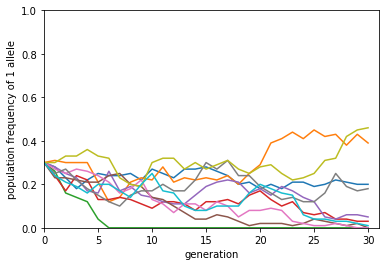

In [30]:
for pop in pops:
    pop.plotTraj();
plt.xlabel("generation")
plt.ylabel("population frequency of 1 allele") 

Now that we know it works, let's explore this a bit numerically. Try to get at least 1000 runs

Text(0,0.5,'population frequency')

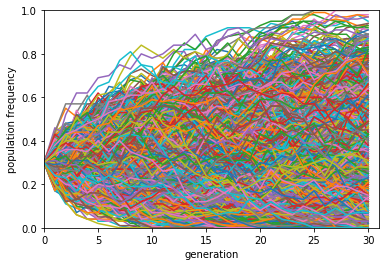

In [31]:
nInd = 100
nGen = 30 
nRuns = 2000 
p0 = 0.3
pops = [population(nInd, p0) for i in range(nRuns)] 
for pop in pops:
    pop.evolve(nGen);
    pop.plotTraj();

plt.xlabel("generation")
plt.ylabel("population frequency") 


So there is a lot of randomness in there, but if you run it multiple times you should see that there is some regularity in how fast the allele frequencies depart from the initial values.  
To investigate this, calculate and plot the distribution of frequency at each generation. 

In [32]:
def frequencyAtGen(generation_number, populations, nBins=11):
    """calculates the allele frequency at generation genN for a list of populations pops. 
     Generates a histogram of the observed values"""
    counts_per_bin, bin_edge_positions = np.histogram([pop.traj[generation_number] for pop in populations], bins=nBins, range=(0,1)) 
    
    bin_centers=np.array([(bin_edge_positions[i+1]+bin_edge_positions[i]) / 2 for i in range(len(counts_per_bin))]) 
    return bin_centers, counts_per_bin # Return the data from which we will generate the plot

Text(0,0.5,'Number of simulated populations ')

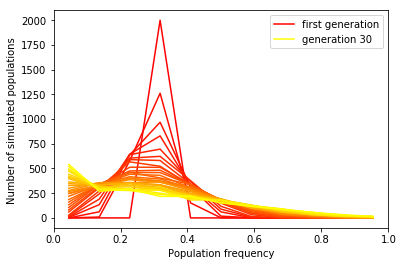

In [33]:
nBins = 11 # The number of frequency bins that we will use to partition the data.
for i in range(nGen+1):
    
    bin_centers, counts_per_bin = frequencyAtGen(i, pops, nBins); 
    if i==0:
        plt.plot(bin_centers, counts_per_bin, color=plt.cm.autumn(i*1./nGen), label="first generation")  # cm.autumn(i*1./nGen) returns the 
                                                                        #  color with which to plot the current line
    elif i==nGen:
        plt.plot(bin_centers, counts_per_bin, color=plt.cm.autumn(i*1./nGen), label="generation %d"% (nGen,))
    else:
        plt.plot(bin_centers, counts_per_bin, color=plt.cm.autumn(i*1./nGen))
plt.legend()
plt.xlabel("Population frequency")
plt.ylabel("Number of simulated populations ")


There are three important observations here:

    1-Frequencies tend to spread out over time 
    2-Over time, there are more and more populations at frequencies 0 and 1. Since, initial allele frequency is 0.3 (low value), it is very likey for future generations to have no alternate alleles, therefore more and more populations have frequency of 0. And it is also slightly likely to have populations at 1 given initial frequency isn't very low either. You can expect a symmetric curve if you have initial frequency to be 0.5
    3-Apart from the 0 and 1 bins, the distribution becomes entirely flat.

A few alternate ways of visualizing the data: first a density map

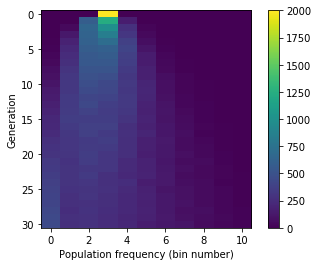

In [17]:
nBins = 11
sfs_by_generation = np.array([frequencyAtGen(i, pops, nBins=nBins)[1] for i in range(0, nGen+1)])
bins = frequencyAtGen(i, pops, nBins=nBins)[0]
plt.imshow(sfs_by_generation, aspect=nBins*1./nGen, interpolation='nearest')
plt.xlabel("Population frequency (bin number)")
plt.ylabel("Generation")
plt.colorbar()

Then a 3D histogram.

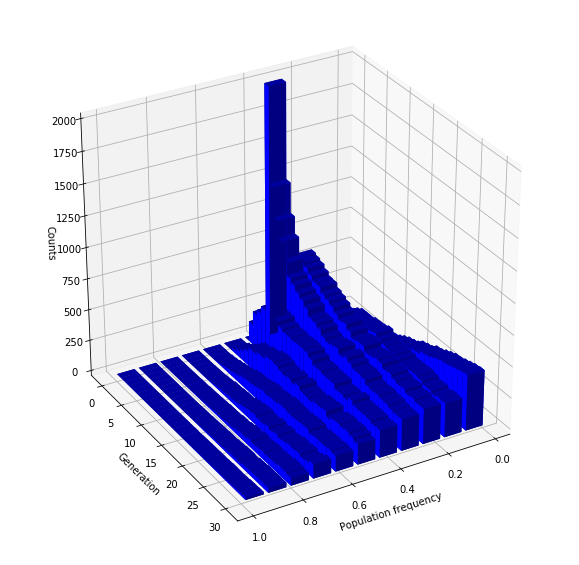

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d', elev=90)
xedges = bins
yedges = np.arange(nGen+1)

xpos, ypos = np.meshgrid(xedges-.4/nBins, yedges-0.5)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = 0 * ypos
dx = .8 / nBins
dy = 1
dz = sfs_by_generation.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', edgecolor='none', alpha=0.15)

ax.view_init(elev=30., azim=60)
ax.set_xlabel("Population frequency")
ax.set_ylabel("Generation")
ax.set_zlabel("Counts")

plt.show()

Now let's dig into the effect of population size in a bit more detail.
Consider the change in frequency after just one generation: 


The expected distribution of allele frequencies after one generation would be that of a binomial distribution. It is mathematically defined as follows:
    
    Frequency of alternate alleles after one generation, j = Binomial( $N$, $p$) = C(N,j) * p^j (1-p)^(N-j)
    
Variance of this distribution:
    
    Variance = Np(1-p)

        


To study the effect of population size on the rate of change in allele frequencies, plot the distribution of allele frequencies after nGen generation. Start with nGen=1 generation. 



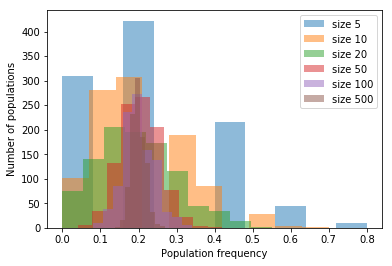

In [23]:
histograms = []
variances = []
p0 = 0.2
sizes = [5, 10, 20, 50, 100, 500] 
nGen = 1
for nInd in sizes:
    pops=[population(nInd,p0) for i in range(1000)] 
    [pop.evolve(nGen) for pop in pops]
    sample = [pop.getTraj()[-1] for pop in pops]
    variances.append(np.var(sample))
    histograms.append(plt.hist(sample, alpha=0.5, label="size %d" % (nInd,) ))
plt.xlabel("Population frequency")
plt.ylabel("Number of populations")
plt.legend()

So how does population size affect the change in allele frequency after one generation?

The variance in allele frequency is clearly decreasing with increase in population size. 
    
    Variance = 1/(2N)
        where, N - population size
        
    This function is more and more accurate for large values of N. 

For short times, the expected changes in allele frequencies, $Var\left[E[(x-x_0)^2)\right]$, are larger for smaller population, a crucial result of population genetics. 

The next question is: How does the rate of change in allele frequency depend on the initial allele frequency? We can plot the histograms of allele frequency as before:


Text(0,0.5,'Number of populations')

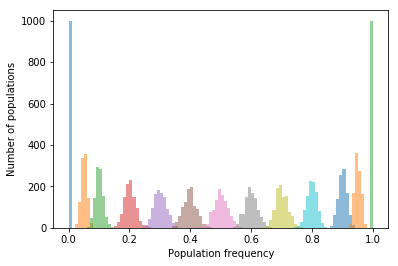

In [21]:
histograms = []
variances = []
p0_list = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, .6, .7, .8, 0.9, 0.95, 1]) 
nGen = 1 
for p0 in p0_list:
    pops = [population(nInd, p0) for i in range(1000)] 
    [pop.evolve(nGen) for pop in pops]
    sample = [pop.getTraj()[-1] for pop in pops]
    variances.append(np.var(sample))
    histograms.append(plt.hist(sample, 100, alpha=0.5, range=(0,1)))
plt.xlabel("Population frequency")
plt.ylabel("Number of populations")

## Mutation
New mutations enter the population in a single individual, and therefore begin their journey at frequency $\frac{1}{N}$. Let's numerically estimate the probability that such a new mutation will eventually fix (i.e., the probability that the mutation reaches frequency 1) in the population, if no subsequent mutations occur. 



In [34]:
nInd = 10
nGen = 100
nRuns = 2000
#enter the initial allele frequency for new mutations
p0 = 1/nInd
pops = [population(nInd,p0) for i in range(nRuns)] 
[pop.evolve(nGen) for pop in pops]; 

We can plot the number of populations at each frequency, as we did above.

Text(0,0.5,'Number of simulations')

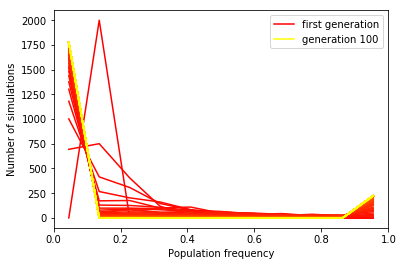

In [35]:
nBins = nInd + 1  # We want to have bins for 0,1,2,...,N copies of the allele. 
proportion_fixed = []  # fixation rate
for i in range(nGen+1):
    x,y = frequencyAtGen(i, pops, nBins);     
    if i==0:
        plt.plot(x, y, color=plt.cm.autumn(i*1./nGen), label="first generation")  # cm.autumn(i*1./nGen) returns the 
                                                                            #color with which to plot the current line
    elif i==nGen:
        plt.plot(x, y, color=plt.cm.autumn(i*1./nGen), label="generation %d"% (nGen,) )
    else:
        plt.plot(x, y, color=plt.cm.autumn(i*1./nGen))
    
    #we'll consider a population "fixed" if it is in the highest-frequency bin. It's
    #an approximation, but not a bad one if the number of bins is comparable to the 
    #population size.
    proportion_fixed.append((i, y[-1]*1./nRuns))
    
plt.legend()    
plt.xlabel("Population frequency")
plt.ylabel("Number of simulations")

Probability that a new mutation fixes in the population = p0 = 1/nInd

For the computational part, note that we already computed the proportion of fixed alleles vs time in the "proportion_fixed" variable. Make sure that the numerical value agrees with the mathematical expectation.

Text(0,0.5,'Fixation probability')

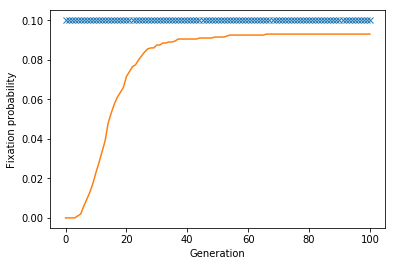

In [25]:
proportion_fixed = np.array(proportion_fixed)

fixation_probability = [p0]*(nGen+1)
plt.plot(proportion_fixed[:,0], np.array(fixation_probability), 'x', label='theory')
plt.plot(proportion_fixed[:,0], proportion_fixed[:,1], '-', label="simulation")
plt.xlabel("Generation")
plt.ylabel("Fixation probability")

# Summary

* In finite populations, sampling fluctuations are an important driver of allele frequency change.
* These sampling fluctuations cause larger frequency changes in smaller populations.
* These fluctuations mean that alleles eventually fix one way or another -- We need new mutations to maintain diversity within a population.
* For neutral alleles, the probability of new mutations fixing in the population is inversely proportional to the population size

# References:
1. "Statistical Inference in the Wright–Fisher Model Using Allele Frequency Data",Paula Tataru  Maria Simonsen  Thomas Bataillon  Asger Hobolth, Systematic Biology, Volume 66, Issue 1, 1 January 2017, Pages e30–e46
https://academic.oup.com/sysbio/article/66/1/e30/2670014

2. Ewens W. J., 2004.  Mathematical Population Genetics 1: Theoretical Introduction, Vol27 Springer, New York.